Import necessary libraries

In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np
import matplotlib.pyplot as plt


LOG.propagate = False

**Connect to the board via BLE**

In [540]:
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2025-03-19 00:04:00,392 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:81:80:25:12:64
2025-03-19 00:04:06,918 | INFO     |: Connected to c0:81:80:25:12:64


In [373]:

ble.send_command(CMD.GET_TOF1, "")
distance1 = int(ble.receive_string(ble.uuid['RX_STRING']))
print(f"Measured distance: {distance1}")


ble.send_command(CMD.GET_TOF2, "")
distance1 = int(ble.receive_string(ble.uuid['RX_STRING']))
print(f"Measured distance: {distance1}")

Measured distance: 152
Measured distance: 93


In [43]:
control_timestamps = []
i_err = []
p_err = []
speed = []
distance = []
dt = []

tof_available = []

def extract_control_data(uuid, byte_array):
    string = byte_array.decode("utf-8") 
    split_str = string.split("|")
    control_timestamps.append(int(split_str[0]))
    speed.append(int(split_str[1]))
    p_err.append(int(split_str[2]))
    i_err.append(int(split_str[3]))
    distance.append(int(split_str[4]))
    dt.append(int(split_str[5]))
    tof_available.append(int(split_str[6]))
    
ble.start_notify(ble.uuid['RX_STRING'], extract_control_data)

In [17]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [24]:
ble.send_command(CMD.FORWARD_CONTROLLED, "0.1|0.00001|60|300|20|20000")

In [822]:
ble.send_command(CMD.FORWARD_EXTRAPOLATE, "0.1|0.00001|80|360|20|10000")

In [399]:
ble.send_command(CMD.BACKWARD, "255")

In [404]:
ble.send_command(CMD.FORWARD, "100|100")

In [405]:
ble.send_command(CMD.STOP, "")

In [403]:
print("timestamps:")
print(control_timestamps)
print("speed:")
print(speed)
print("p err:")
print(p_err)
print("i err:")
print(i_err)
print("distance")
print(distance)
print("data available:")
print(tof_available)
print("dt: ")
print(dt)




timestamps:
[]
speed:
[-190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190, -190,

In [ ]:
import csv
# Define the CSV filename
filename = "sensor_data.csv"

# Save to CSV
with open(filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    
    # Write the header
    writer.writerow(["Timestamps", "Speed", "P Error", "I Error", "Distance", "Data Available", "dt"])
    
    # Write the data rows
    for i in range(len(control_timestamps)):  # Assuming all lists have the same length
        writer.writerow([
            control_timestamps[i], 
            speed[i], 
            p_err[i], 
            i_err[i], 
            distance[i], 
            tof_available[i], 
            dt[i]
        ])

print(f"Data saved to {filename} successfully!")

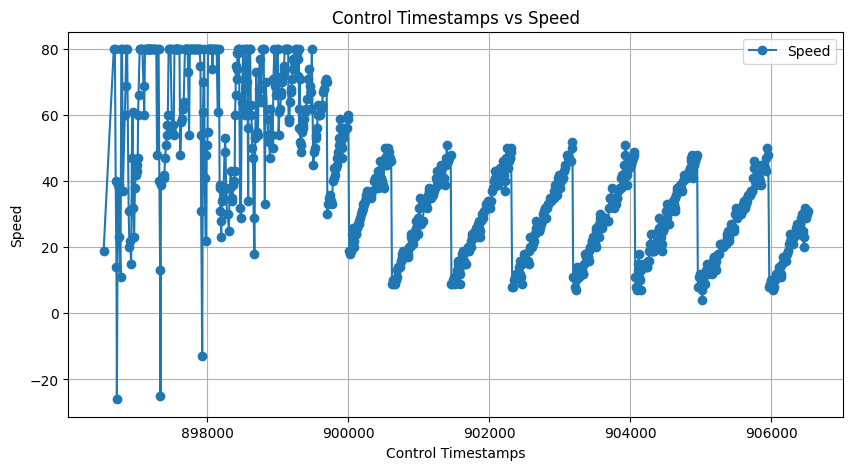

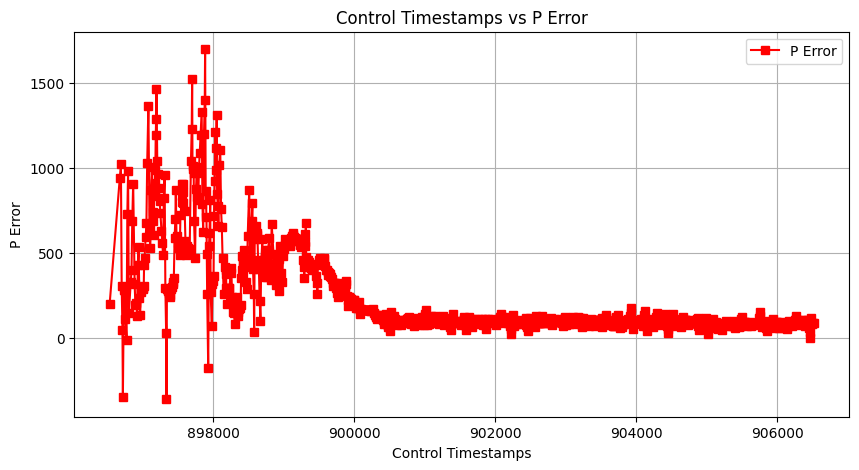

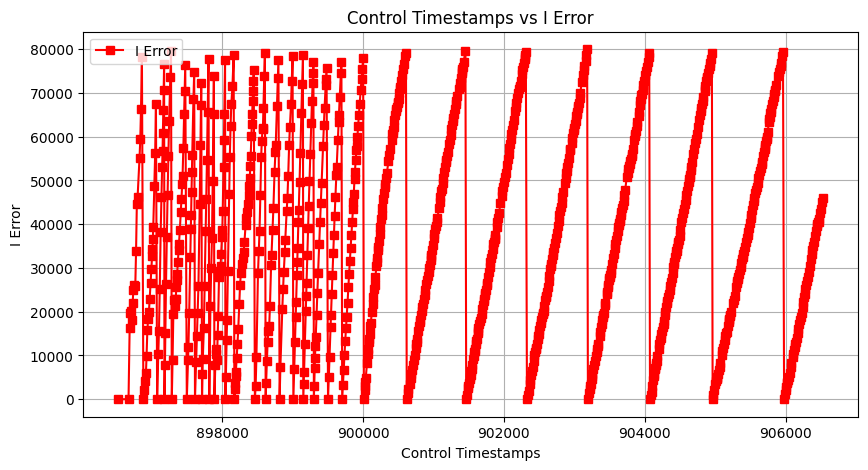

In [797]:
import matplotlib.pyplot as plt
import numpy as np

# Convert lists to numpy arrays for better performance
control_timestamps = np.array(control_timestamps)
speed = np.array(speed)
p_err = np.array(p_err)
i_err = np.array(i_err)

# Plot control timestamps vs. speed
plt.figure(figsize=(10, 5))
plt.plot(control_timestamps, speed, marker='o', linestyle='-', label='Speed')
plt.xlabel('Control Timestamps')
plt.ylabel('Speed')
plt.title('Control Timestamps vs Speed')
plt.legend()
plt.grid(True)
plt.show()

# Plot control timestamps vs. p_err
plt.figure(figsize=(10, 5))
plt.plot(control_timestamps, p_err, marker='s', linestyle='-', label='P Error', color='r')
plt.xlabel('Control Timestamps')
plt.ylabel('P Error')
plt.title('Control Timestamps vs P Error')
plt.legend()
plt.grid(True)
plt.show()

# Plot control timestamps vs. i_err
plt.figure(figsize=(10, 5))
plt.plot(control_timestamps, i_err, marker='s', linestyle='-', label='I Error', color='r')
plt.xlabel('Control Timestamps')
plt.ylabel('I Error')
plt.title('Control Timestamps vs I Error')
plt.legend()
plt.grid(True)
plt.show()


In [431]:
print(p_err)

[350, 363, 331, 366, 349, 390, 382, 347, 360, 382, 343, 359, 401, 335, 364, 371, 373, 372, 421, 392, 375, 408, 436, 441, 449, 468, 475, 505, 532, 523, 586, 588, 582, 643, 540, 519, 542, 365, 391, 267, 319, 276, 294, 280, 286, 278, 296, 265, 263, 268, 265, 240, 242, 235, 239, 231, 224, 215, 165, 169, 175, 163, 157, 162, 162, 151, 150, 151, 147, 145, 147, 138, 145, 141, 135, 140, 146, 148, 161, 161, 167, 169, 169, 167, 184, 188, 188, 186, 190, 189, 205, 211, 239, 277, 293, 413, 599, 649, 674, 677, 687, 697, 703, 694, 706, 712, 709, 709, 715, 734, 721, 710, 719, 703, 706, 692, 671, 655, 647, 654, 645, 623, 569, 493, 501, 494, 358, 278, 232, 194, 127, 88]


In [363]:
print(i_err)

[652, 17206, 48265, 110217, 177225, 242555, 307047, 375141, 441166, 507999, 567339, 632105, 690917, 756197, 820832, 881634, 946074, 1007844, 1073455, 1138499, 1197829, 1257933, 1319904, 1384409, 1445405, 1503530, 1550188, 1595080, 1635575, 1670819, 1702769, 1731160, 1757504, 1782408, 1805376, 1826720, 1845878, 1862531, 1877637, 1890832, 1901620, 1910728, 1919009, 1927265, 1935435, 1942579, 1948903, 1954423, 1959246, 1963852, 1968544, 1972930, 1977634, 1981726, 1985315, 1987947, 1990851, 1994157, 1996649, 1998696, 2000670, 2002455, 2003879]


In [498]:
ble.stop_notify(ble.uuid['RX_STRING'])

Exception in callback extract_control_data()() at C:\Users\zhang\AppData\Local\Temp\ipykernel_42532\2896794631.py:10
handle: <Handle extract_control_data()() at C:\Users\zhang\AppData\Local\Temp\ipykernel_42532\2896794631.py:10>
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.13_3.13.752.0_x64__qbz5n2kfra8p0\Lib\asyncio\events.py", line 89, in _run
    self._context.run(self._callback, *self._args)
    ~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\zhang\AppData\Local\Temp\ipykernel_42532\2896794631.py", line 16, in extract_control_data
    d_err.append(int(split_str[3]))
                 ~~~^^^^^^^^^^^^^^
ValueError: invalid literal for int() with base 10: '0.000'
Exception in callback extract_control_data()() at C:\Users\zhang\AppData\Local\Temp\ipykernel_42532\2896794631.py:10
handle: <Handle extract_control_data()() at C:\Users\zhang\AppData\Local\Temp\ipykernel_42532\2896794631.py:10>
Traceback (most recent

In [546]:
ble.send_command(CMD.SEND_PID_DATA, "")

In [545]:
control_yaw_timestamps = []
speed = []
p_err = []
d_err = []
yaw = []
dt = []

tof_available = []

def extract_control_data(uuid, byte_array):
    string = byte_array.decode("utf-8") 
    split_str = string.split("|")
    control_yaw_timestamps.append(int(split_str[0]))
    speed.append(int(split_str[1]))
    p_err.append(int(split_str[2]))
    d_err.append(float(split_str[3]))
    yaw.append(float(split_str[4]))
    dt.append(int(split_str[5]))
    
ble.start_notify(ble.uuid['RX_STRING'], extract_control_data)

Start Yaw Control

In [542]:
# packet should be in the form of "yaw_control?|target_yaw_value|max_clockwise_speed|min_clockwise_speed|max_counter_clockwise_speed|min_counter_clockwise_speed|P_GAIN|D_GAIN|alpha"
ble.send_command(CMD.YAW_CONTROL, "1|90|250|80|250|80|8|0.7|0.1")

Start Recording Data

In [541]:
ble.send_command(CMD.RECORD_PID_DATA, "1")

Stop Recording Data

In [543]:
ble.send_command(CMD.RECORD_PID_DATA, "0")

Stop Yaw Control

In [544]:
ble.send_command(CMD.YAW_CONTROL, "0|2|60|20|60|20|30")
ble.send_command(CMD.STOP, "")

In [547]:
print("timestamps:")
print(control_yaw_timestamps)
print("speed:")
print(speed)
print("p err:")
print(p_err)
print("d_err:")
print(d_err)
print("yaw:")
print(yaw)
print("dt: ")
print(dt)


timestamps:
[27367, 27368, 27375, 27385, 27386, 27396, 27402, 27414, 27422, 27429, 27439, 27440, 27449, 27455, 27460, 27468, 27472, 27482, 27483, 27492, 27498, 27503, 27509, 27515, 27527, 27531, 27541, 27542, 27552, 27558, 27568, 27569, 27581, 27585, 27596, 27606, 27612, 27622, 27625, 27633, 27639]
speed:
[250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250, 250]
p err:
[170, 170, 170, 170, 170, 170, 170, 166, 166, 166, 166, 166, 166, 166, 166, 160, 160, 160, 160, 160, 160, 160, 160, 160, 154, 154, 154, 154, 154, 154, 154, 154, 147, 147, 147, 147, 147, 147, 141, 141, 141]
d_err:
[2126.0, 1913.0, 1722.0, 1550.0, 1395.0, 1255.0, 1130.0, 973.0, 875.0, 788.0, 709.0, 638.0, 574.0, 517.0, 465.0, 344.0, 310.0, 279.0, 251.0, 225.0, 203.0, 183.0, 164.0, 148.0, 53.0, 48.0, 43.0, 39.0, 35.0, 31.0, 28.0, 25.0, -57.0, -51.0, -46.0, -41.0, -37.0, -33.0, -

**Sampling Rate Analysis**

We are logging dt, the time in between control loop executions. We can find the mean of our dt values to find the frequency at which our loop executes

In [324]:
mean_dt = np.mean(dt)
print(f"Average time between control loop executions {mean_dt} ms")
print(f"Control loop execution frequency {1 / (mean_dt * 10e-3)} Hz")


Average time between control loop executions 8.46526867627785 ms
Control loop execution frequency 11.812974144604429 Hz


In [11]:
ble.stop_notify(ble.uuid['RX_STRING'])

In [45]:
ble.send_command(CMD.TURN_RIGHT, "150|200")

In [46]:
ble.send_command(CMD.STOP, "")

In [222]:
ble.send_command(CMD.TURN_LEFT, "150|250")

In [239]:
ble.send_command(CMD.STOP, "")

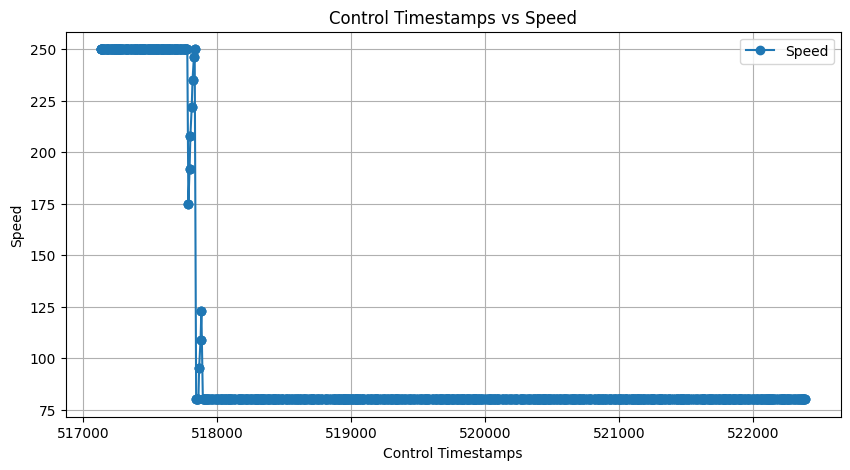

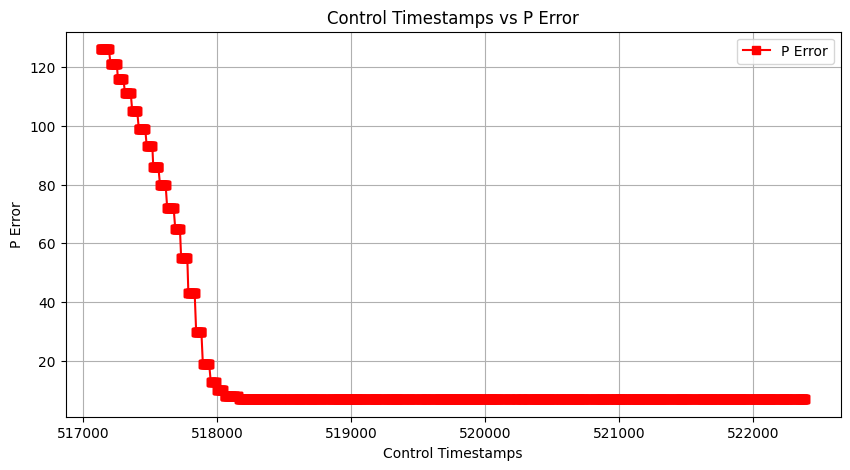

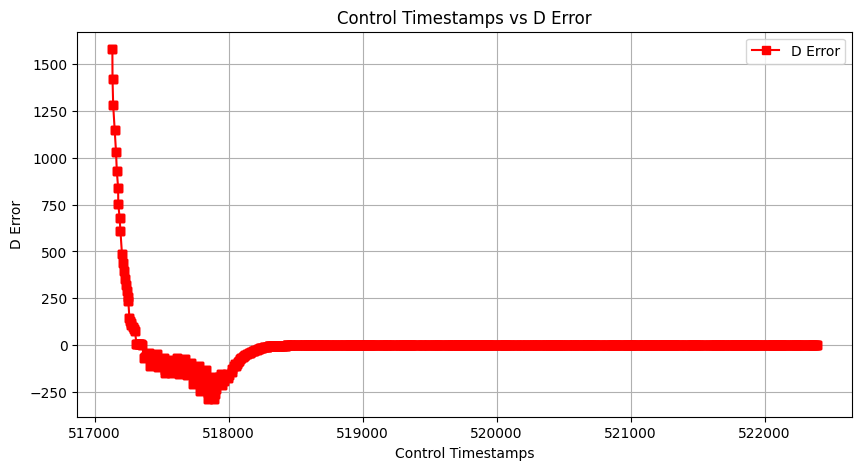

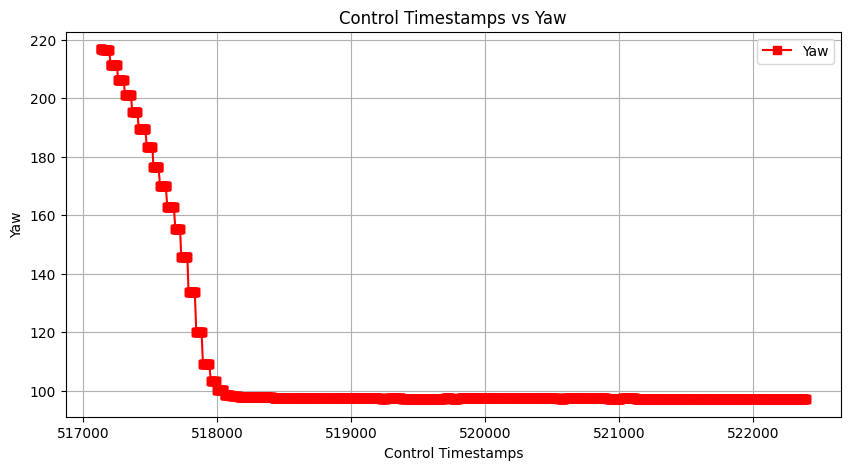

In [526]:
# Convert lists to numpy arrays for better performance
control_yaw_timestamps = np.array(control_yaw_timestamps)
speed = np.array(speed)
p_err = np.array(p_err)
d_err = np.array(d_err)
yaw = np.array(yaw)

# Plot control timestamps vs. speed
plt.figure(figsize=(10, 5))
plt.plot(control_yaw_timestamps, speed, marker='o', linestyle='-', label='Speed')
plt.xlabel('Control Timestamps')
plt.ylabel('Speed')
plt.title('Control Timestamps vs Speed')
plt.legend()
plt.grid(True)
plt.show()

# Plot control timestamps vs. p_err
plt.figure(figsize=(10, 5))
plt.plot(control_yaw_timestamps, p_err, marker='s', linestyle='-', label='P Error', color='r')
plt.xlabel('Control Timestamps')
plt.ylabel('P Error')
plt.title('Control Timestamps vs P Error')
plt.legend()
plt.grid(True)
plt.show()

# Plot control timestamps vs. d_err
plt.figure(figsize=(10, 5))
plt.plot(control_yaw_timestamps, d_err, marker='s', linestyle='-', label='D Error', color='r')
plt.xlabel('Control Timestamps')
plt.ylabel('D Error')
plt.title('Control Timestamps vs D Error')
plt.legend()
plt.grid(True)
plt.show()

# Plot control timestamps vs. yaw
plt.figure(figsize=(10, 5))
plt.plot(control_yaw_timestamps, yaw, marker='s', linestyle='-', label='Yaw', color='r')
plt.xlabel('Control Timestamps')
plt.ylabel('Yaw')
plt.title('Control Timestamps vs Yaw')
plt.legend()
plt.grid(True)
plt.show()


ValueError: x and y must have same first dimension, but have shapes (774,) and (0,)

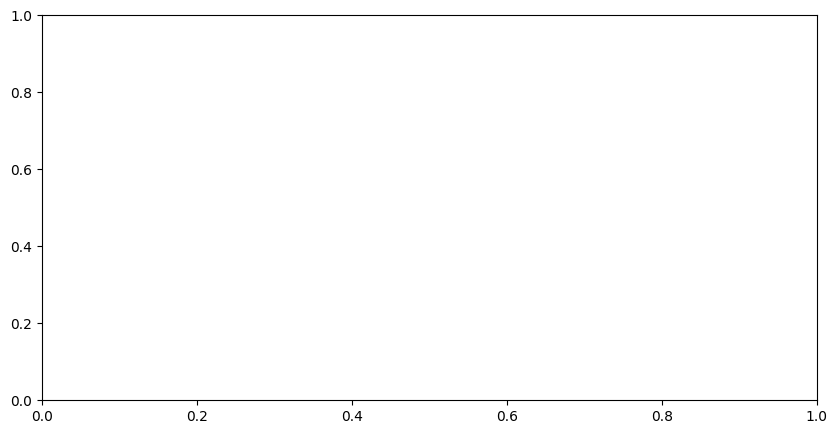

In [282]:
# Find the index of the value closest to 42500 in control_yaw_timestamps
# index_42500 = np.searchsorted(control_yaw_timestamps, 42500)

# Slice the arrays up to this index
truncated_timestamps = control_yaw_timestamps[1:]
speed = speed[1:]

# Plot control timestamps vs. speed
plt.figure(figsize=(10, 5))
plt.plot(truncated_timestamps, speed, marker='o', linestyle='-', label='Speed')
plt.xlabel('Control Timestamps')
plt.ylabel('Speed')
plt.title('Control Timestamps vs Speed')
plt.legend()
plt.grid(True)
plt.show()